# Showing waveform and spectrograms of a sample recording

references: 

https://stackoverflow.com/questions/44787437/how-to-convert-a-wav-file-to-a-spectrogram-in-python3

Log transformation - https://www.kaggle.com/msripooja/steps-to-convert-audio-clip-to-spectrogram

To view, make sure you have a sample file in the relative address "./sample.wav"


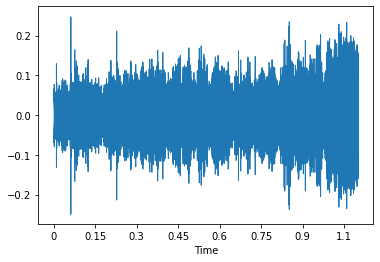

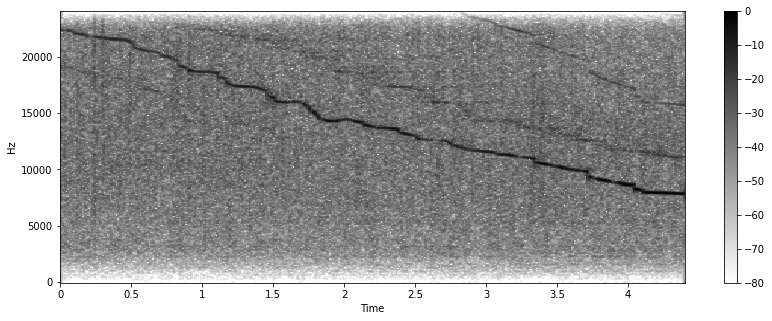

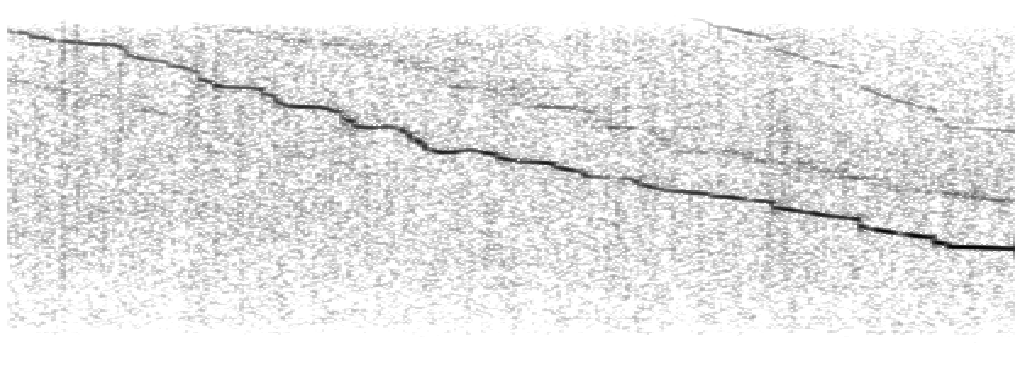

In [26]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

y, SAMPLE_RATE = librosa.load("./sample.wav", sr=48000)
FFT_NUM = 512
IMG_SIZE = (14, 5)

# show waveform of sample recording
librosa.display.waveshow(y, sr=SAMPLE_RATE)

Y = librosa.stft(y, n_fft=FFT_NUM) # Apply fourier transform
Ydb = librosa.amplitude_to_db(abs(Y), ref=np.max) # Convert amplitude spectrogram to dB-scaled spec
fig = plt.figure(figsize=IMG_SIZE) # Specify the size of the figure

# show spectrogram of sample recording
librosa.display.specshow(Ydb, cmap="gray_r", sr=SAMPLE_RATE, x_axis='time', y_axis='hz')
plt.colorbar()

# Redraw without the axis and colourbar
fig = plt.figure(frameon=False)
fig.set_size_inches(IMG_SIZE[0], IMG_SIZE[1])
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
librosa.display.specshow(Ydb, cmap='gray_r', sr=SAMPLE_RATE, x_axis='time', y_axis='hz', clim=[np.mean(Ydb),0])
# plt.imshow()

#Saving the file
fig.savefig("saved_spectrogram.png")

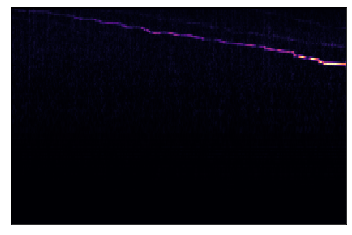

In [29]:
sgram_mag, _ = librosa.magphase(Y)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=SAMPLE_RATE)
librosa.display.specshow(mel_scale_sgram)

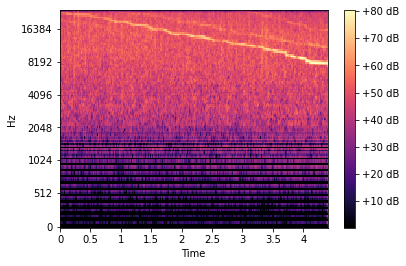

In [30]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=SAMPLE_RATE, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')